# Profitable App Profiles for the App Store and Google Play Markets

We make our apps available on Google Play and the App Store. We only build apps that are free to download and install, and our main source of revenue consists of in-app ads.

This means our revenue for any given app is mostly influenced by the number of users who use our app — the more users that see and engage with the ads, the better.

Our goal for this project is to analyze data to help our developers understand what type of apps are likely to attract more users.

In [2]:
def open_dataset(file_name):
    opened_file = open(file_name)
    from csv import reader
    read_file = reader(opened_file)
    data = list(read_file)
    
    return data

In [3]:
# Googe Play Dataset open
data_set_google = open_dataset("googleplaystore.csv")

#Apple Dataset open
data_set_apple = open_dataset("AppleStore.csv")

In [4]:
def explore_data(dataset, start, end, rows_and_columns=False):
    dataset_slice = dataset[start:end]    
    for row in dataset_slice:
        print(row)
        print('\n') # adds a new (empty) line after each row

    if rows_and_columns:
        print('Number of rows:', len(dataset))
        print('Number of columns:', len(dataset[0]))

In [5]:
explore_data(data_set_google, 0, 5, rows_and_columns=True)

['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']


['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up']


['Coloring book moana', 'ART_AND_DESIGN', '3.9', '967', '14M', '500,000+', 'Free', '0', 'Everyone', 'Art & Design;Pretend Play', 'January 15, 2018', '2.0.0', '4.0.3 and up']


['U Launcher Lite – FREE Live Cool Themes, Hide Apps', 'ART_AND_DESIGN', '4.7', '87510', '8.7M', '5,000,000+', 'Free', '0', 'Everyone', 'Art & Design', 'August 1, 2018', '1.2.4', '4.0.3 and up']


['Sketch - Draw & Paint', 'ART_AND_DESIGN', '4.5', '215644', '25M', '50,000,000+', 'Free', '0', 'Teen', 'Art & Design', 'June 8, 2018', 'Varies with device', '4.2 and up']


Number of rows: 10842
Number of columns: 13


In [6]:
explore_data(data_set_apple, 0, 5, rows_and_columns=True)

['id', 'track_name', 'size_bytes', 'currency', 'price', 'rating_count_tot', 'rating_count_ver', 'user_rating', 'user_rating_ver', 'ver', 'cont_rating', 'prime_genre', 'sup_devices.num', 'ipadSc_urls.num', 'lang.num', 'vpp_lic']


['284882215', 'Facebook', '389879808', 'USD', '0.0', '2974676', '212', '3.5', '3.5', '95.0', '4+', 'Social Networking', '37', '1', '29', '1']


['389801252', 'Instagram', '113954816', 'USD', '0.0', '2161558', '1289', '4.5', '4.0', '10.23', '12+', 'Photo & Video', '37', '0', '29', '1']


['529479190', 'Clash of Clans', '116476928', 'USD', '0.0', '2130805', '579', '4.5', '4.5', '9.24.12', '9+', 'Games', '38', '5', '18', '1']


['420009108', 'Temple Run', '65921024', 'USD', '0.0', '1724546', '3842', '4.5', '4.0', '1.6.2', '9+', 'Games', '40', '5', '1', '1']


Number of rows: 7198
Number of columns: 16


In [7]:
print(data_set_google[0])
print('\n')
print(data_set_apple[0])

['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']


['id', 'track_name', 'size_bytes', 'currency', 'price', 'rating_count_tot', 'rating_count_ver', 'user_rating', 'user_rating_ver', 'ver', 'cont_rating', 'prime_genre', 'sup_devices.num', 'ipadSc_urls.num', 'lang.num', 'vpp_lic']


In [8]:
print(len(data_set_google[10473]))
print(data_set_google[10473])

12
['Life Made WI-Fi Touchscreen Photo Frame', '1.9', '19', '3.0M', '1,000+', 'Free', '0', 'Everyone', '', 'February 11, 2018', '1.0.19', '4.0 and up']


# Deleting Wrong Data

In [9]:
# Delete wrong data !!! Don't run this more than once
del data_set_google[10473]

In [10]:
print(data_set_google[10473])
print(len(data_set_google))

['osmino Wi-Fi: free WiFi', 'TOOLS', '4.2', '134203', '4.1M', '10,000,000+', 'Free', '0', 'Everyone', 'Tools', 'August 7, 2018', '6.06.14', '4.4 and up']
10841


## Removing Duplicate Entries
### Part 1
There are some apps have duplicate entries. So we need to remove the duplicate entries and keep only one entry per app.

Count the number of duplicates.


In [11]:
def duplices(data_set):
    duplicates = []
    uniques = []
    for row in data_set:
        if row[0] in uniques:
            duplicates.append(row[0])
        else:
            uniques.append(row[0])
    return duplicates, uniques

In [12]:
dup_uni_google = duplices(data_set_google)
dup_uni_apple = duplices(data_set_apple)

In [13]:
print(len(dup_uni_google[0]), len(dup_uni_apple[0]))

1181 0


### Part 2
We should keep the entries with the highest number of reviews.
Create the dictionary with key:value pair - app:hightest_reviews

In [14]:
reviews_max = {}
for row in data_set_google[1:]: # without header row
    name = row[0]
    rating = float(row[3]) #retrieved data from dataset --> STR
    if name in reviews_max and rating > reviews_max[name]:
        reviews_max[name] = rating
    elif name not in reviews_max:
        reviews_max[name] = rating
#print(reviews_max)
print("Actual Lenght:", len(reviews_max))
print("Expected Lenght:", len(data_set_google[1:]) - len(dup_uni_google[0]))
        

Actual Lenght: 9659
Expected Lenght: 9659


In [15]:
# we use the created above dictionary to remove the duplicate rows
android_clean = []
already_added = []
for row in data_set_google[1:]:
    name = row[0]
    n_reviews = float(row[3])
    if (reviews_max[name] == n_reviews) and (name not in already_added): # type must be the same !!! float == float
        android_clean.append(row)
        already_added.append(name) # make sure this is inside the if block
        

In [16]:
print(len(android_clean))
explore_data(android_clean, 0, 3, True)

9659
['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up']


['U Launcher Lite – FREE Live Cool Themes, Hide Apps', 'ART_AND_DESIGN', '4.7', '87510', '8.7M', '5,000,000+', 'Free', '0', 'Everyone', 'Art & Design', 'August 1, 2018', '1.2.4', '4.0.3 and up']


['Sketch - Draw & Paint', 'ART_AND_DESIGN', '4.5', '215644', '25M', '50,000,000+', 'Free', '0', 'Teen', 'Art & Design', 'June 8, 2018', 'Varies with device', '4.2 and up']


Number of rows: 9659
Number of columns: 13


In [17]:
type(n_reviews)
type(reviews_max[name])

float

## Removing Non-English Apps
### Part One / Two

To minimize the impact of data loss, we'll only remove an app if its name has more than three non-ASCII characters

In [18]:
def is_english(string):
    count = 0
    for i in string:
        if ord(i) > 127:
            count += 1
    if count > 3:
        return False
    else:
        return True

In [19]:
is_english('爱奇艺PPS -《欢乐颂2》电视剧热播')
print(is_english('Docs To Go™ Free Office Suite'))
print(is_english('Ins😂tachat 😜😀😂'))

True
False


In [20]:
english_google = []
for row in android_clean:
    if is_english(row[0]):
        english_google.append(row)

In [21]:
print(english_google[:3])
len(english_google)

[['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up'], ['U Launcher Lite – FREE Live Cool Themes, Hide Apps', 'ART_AND_DESIGN', '4.7', '87510', '8.7M', '5,000,000+', 'Free', '0', 'Everyone', 'Art & Design', 'August 1, 2018', '1.2.4', '4.0.3 and up'], ['Sketch - Draw & Paint', 'ART_AND_DESIGN', '4.5', '215644', '25M', '50,000,000+', 'Free', '0', 'Teen', 'Art & Design', 'June 8, 2018', 'Varies with device', '4.2 and up']]


9614

In [22]:
english_apple = []
for row in data_set_apple[1:]:
    if is_english(row[1]):
        english_apple.append(row)

In [23]:
print(english_apple[:3])
len(english_apple)

[['284882215', 'Facebook', '389879808', 'USD', '0.0', '2974676', '212', '3.5', '3.5', '95.0', '4+', 'Social Networking', '37', '1', '29', '1'], ['389801252', 'Instagram', '113954816', 'USD', '0.0', '2161558', '1289', '4.5', '4.0', '10.23', '12+', 'Photo & Video', '37', '0', '29', '1'], ['529479190', 'Clash of Clans', '116476928', 'USD', '0.0', '2130805', '579', '4.5', '4.5', '9.24.12', '9+', 'Games', '38', '5', '18', '1']]


6183

In [24]:
explore_data(english_google, 0, 3, True)
print('\n')
explore_data(english_apple, 0, 3, True)

['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up']


['U Launcher Lite – FREE Live Cool Themes, Hide Apps', 'ART_AND_DESIGN', '4.7', '87510', '8.7M', '5,000,000+', 'Free', '0', 'Everyone', 'Art & Design', 'August 1, 2018', '1.2.4', '4.0.3 and up']


['Sketch - Draw & Paint', 'ART_AND_DESIGN', '4.5', '215644', '25M', '50,000,000+', 'Free', '0', 'Teen', 'Art & Design', 'June 8, 2018', 'Varies with device', '4.2 and up']


Number of rows: 9614
Number of columns: 13


['284882215', 'Facebook', '389879808', 'USD', '0.0', '2974676', '212', '3.5', '3.5', '95.0', '4+', 'Social Networking', '37', '1', '29', '1']


['389801252', 'Instagram', '113954816', 'USD', '0.0', '2161558', '1289', '4.5', '4.0', '10.23', '12+', 'Photo & Video', '37', '0', '29', '1']


['529479190', 'Clash of Clans', '116476928', 'USD', '0.0', '2130805', '579', '4.5', '4.5', '9.24.12', '9+', 

## Isolating the Free Apps

Our data sets contain both free and non-free apps; we'll need to isolate only the free apps for our analysis.

In [25]:
free_google = [] # index 6
free_apple = [] # index 4

for row in english_google:
    if row[7] == '0':
        free_google.append(row)
        
for row in english_apple:
    if float(row[4]) == 0.0:
        free_apple.append(row)
            

In [26]:
explore_data(free_google, 0, 3, True)
print('\n')
explore_data(free_apple, 0, 3, True)

['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up']


['U Launcher Lite – FREE Live Cool Themes, Hide Apps', 'ART_AND_DESIGN', '4.7', '87510', '8.7M', '5,000,000+', 'Free', '0', 'Everyone', 'Art & Design', 'August 1, 2018', '1.2.4', '4.0.3 and up']


['Sketch - Draw & Paint', 'ART_AND_DESIGN', '4.5', '215644', '25M', '50,000,000+', 'Free', '0', 'Teen', 'Art & Design', 'June 8, 2018', 'Varies with device', '4.2 and up']


Number of rows: 8864
Number of columns: 13


['284882215', 'Facebook', '389879808', 'USD', '0.0', '2974676', '212', '3.5', '3.5', '95.0', '4+', 'Social Networking', '37', '1', '29', '1']


['389801252', 'Instagram', '113954816', 'USD', '0.0', '2161558', '1289', '4.5', '4.0', '10.23', '12+', 'Photo & Video', '37', '0', '29', '1']


['529479190', 'Clash of Clans', '116476928', 'USD', '0.0', '2130805', '579', '4.5', '4.5', '9.24.12', '9+', 

We're left with 8864 Android apps and 3222 iOS apps, which should be enough for our analysis.

## Most Common Apps by Genre

### Part One

Our aim is to determine the kinds of apps that are likely to attract more users because our revenue is highly influenced by the number of people using our apps.

To minimize risks and overhead, our validation strategy for an app idea is comprised of three steps:

- Build a minimal Android version of the app, and add it to Google Play.
- If the app has a good response from users, we develop it further.
- If the app is profitable after six months, we build an iOS version of the app and add it to the App Store.

Because our end goal is to add the app on both Google Play and the App Store, we need to find app profiles that are successful on both markets. 

### Part Two

We'll need to build a frequency table for the prime_genre column of the App Store data set, and for the Genres and Category columns of the Google Play data set.

In [27]:
def freq_table(data_set, index):
    frequency_table = {}
    total_amount = 0
    
    for row in data_set:
        value = row[index]
        total_amount += 1
        if value in frequency_table:
            frequency_table[value] += 1
        else:
            frequency_table[value] = 1
    
    per_table = {}
    for key in frequency_table:
        per = (frequency_table[key] / total_amount)*100
        per_table[key] = per
            
    return per_table

def display_table(dataset, index):
    table = freq_table(dataset, index)
    table_display = []
    for key in table:
        key_val_as_tuple = (table[key], key)
        table_display.append(key_val_as_tuple)
        
    table_sorted = sorted(table_display, reverse = True)
    for entry in table_sorted:
        print(entry[1], ':', entry[0])

### Part Three
We start by examining the frequency table for the prime_genre column of the App Store data set.

In [28]:
display_table(free_apple, -5)

Games : 58.16263190564867
Entertainment : 7.883302296710118
Photo & Video : 4.9658597144630665
Education : 3.662321539416512
Social Networking : 3.2898820608317814
Shopping : 2.60707635009311
Utilities : 2.5139664804469275
Sports : 2.1415270018621975
Music : 2.0484171322160147
Health & Fitness : 2.0173805090006205
Productivity : 1.7380509000620732
Lifestyle : 1.5828677839851024
News : 1.3345747982619491
Travel : 1.2414649286157666
Finance : 1.1173184357541899
Weather : 0.8690254500310366
Food & Drink : 0.8069522036002483
Reference : 0.5586592178770949
Business : 0.5276225946617008
Book : 0.4345127250155183
Navigation : 0.186219739292365
Medical : 0.186219739292365
Catalogs : 0.12414649286157665


We can see that among the free English apps, more than a half (58.16%) are games. Entertainment apps are close to 8%, followed by photo and video apps, which are close to 5%. Only 3.66% of the apps are designed for education, followed by social networking apps which amount for 3.29% of the apps in our data set.

The general impression is that App Store is dominated by apps that are designed for fun (games, entertainment, photo and video, social networking, sports, music, etc.), while apps with practical purposes (education, shopping, utilities, productivity, lifestyle, etc.) are more rare. However, the fact that fun apps are the most numerous doesn't also imply that they also have the greatest number of users — the demand might not be the same as the offer.

Let's continue by examining the Genres and Category columns of the Google Play data set (two columns which seem to be related).

In [137]:
display_table(free_google, 1)

FAMILY : 18.907942238267147
GAME : 9.724729241877256
TOOLS : 8.461191335740072
BUSINESS : 4.591606498194946
LIFESTYLE : 3.9034296028880866
PRODUCTIVITY : 3.892148014440433
FINANCE : 3.7003610108303246
MEDICAL : 3.531137184115524
SPORTS : 3.395758122743682
PERSONALIZATION : 3.3167870036101084
COMMUNICATION : 3.2378158844765346
HEALTH_AND_FITNESS : 3.0798736462093865
PHOTOGRAPHY : 2.944494584837545
NEWS_AND_MAGAZINES : 2.7978339350180503
SOCIAL : 2.6624548736462095
TRAVEL_AND_LOCAL : 2.33528880866426
SHOPPING : 2.2450361010830324
BOOKS_AND_REFERENCE : 2.1435018050541514
DATING : 1.861462093862816
VIDEO_PLAYERS : 1.7937725631768955
MAPS_AND_NAVIGATION : 1.3989169675090252
FOOD_AND_DRINK : 1.2409747292418771
EDUCATION : 1.1620036101083033
ENTERTAINMENT : 0.9589350180505415
LIBRARIES_AND_DEMO : 0.9363718411552346
AUTO_AND_VEHICLES : 0.9250902527075812
HOUSE_AND_HOME : 0.8235559566787004
WEATHER : 0.8009927797833934
EVENTS : 0.7107400722021661
PARENTING : 0.6543321299638989
ART_AND_DESIGN : 

The landscape seems significantly different on Google Play: there are not that many apps designed for fun, and it seems that a good number of apps are designed for practical purposes (family, tools, business, lifestyle, productivity, etc.). However, if we investigate this further, we can see that the family category (which accounts for almost 19% of the apps) means mostly games for kids.

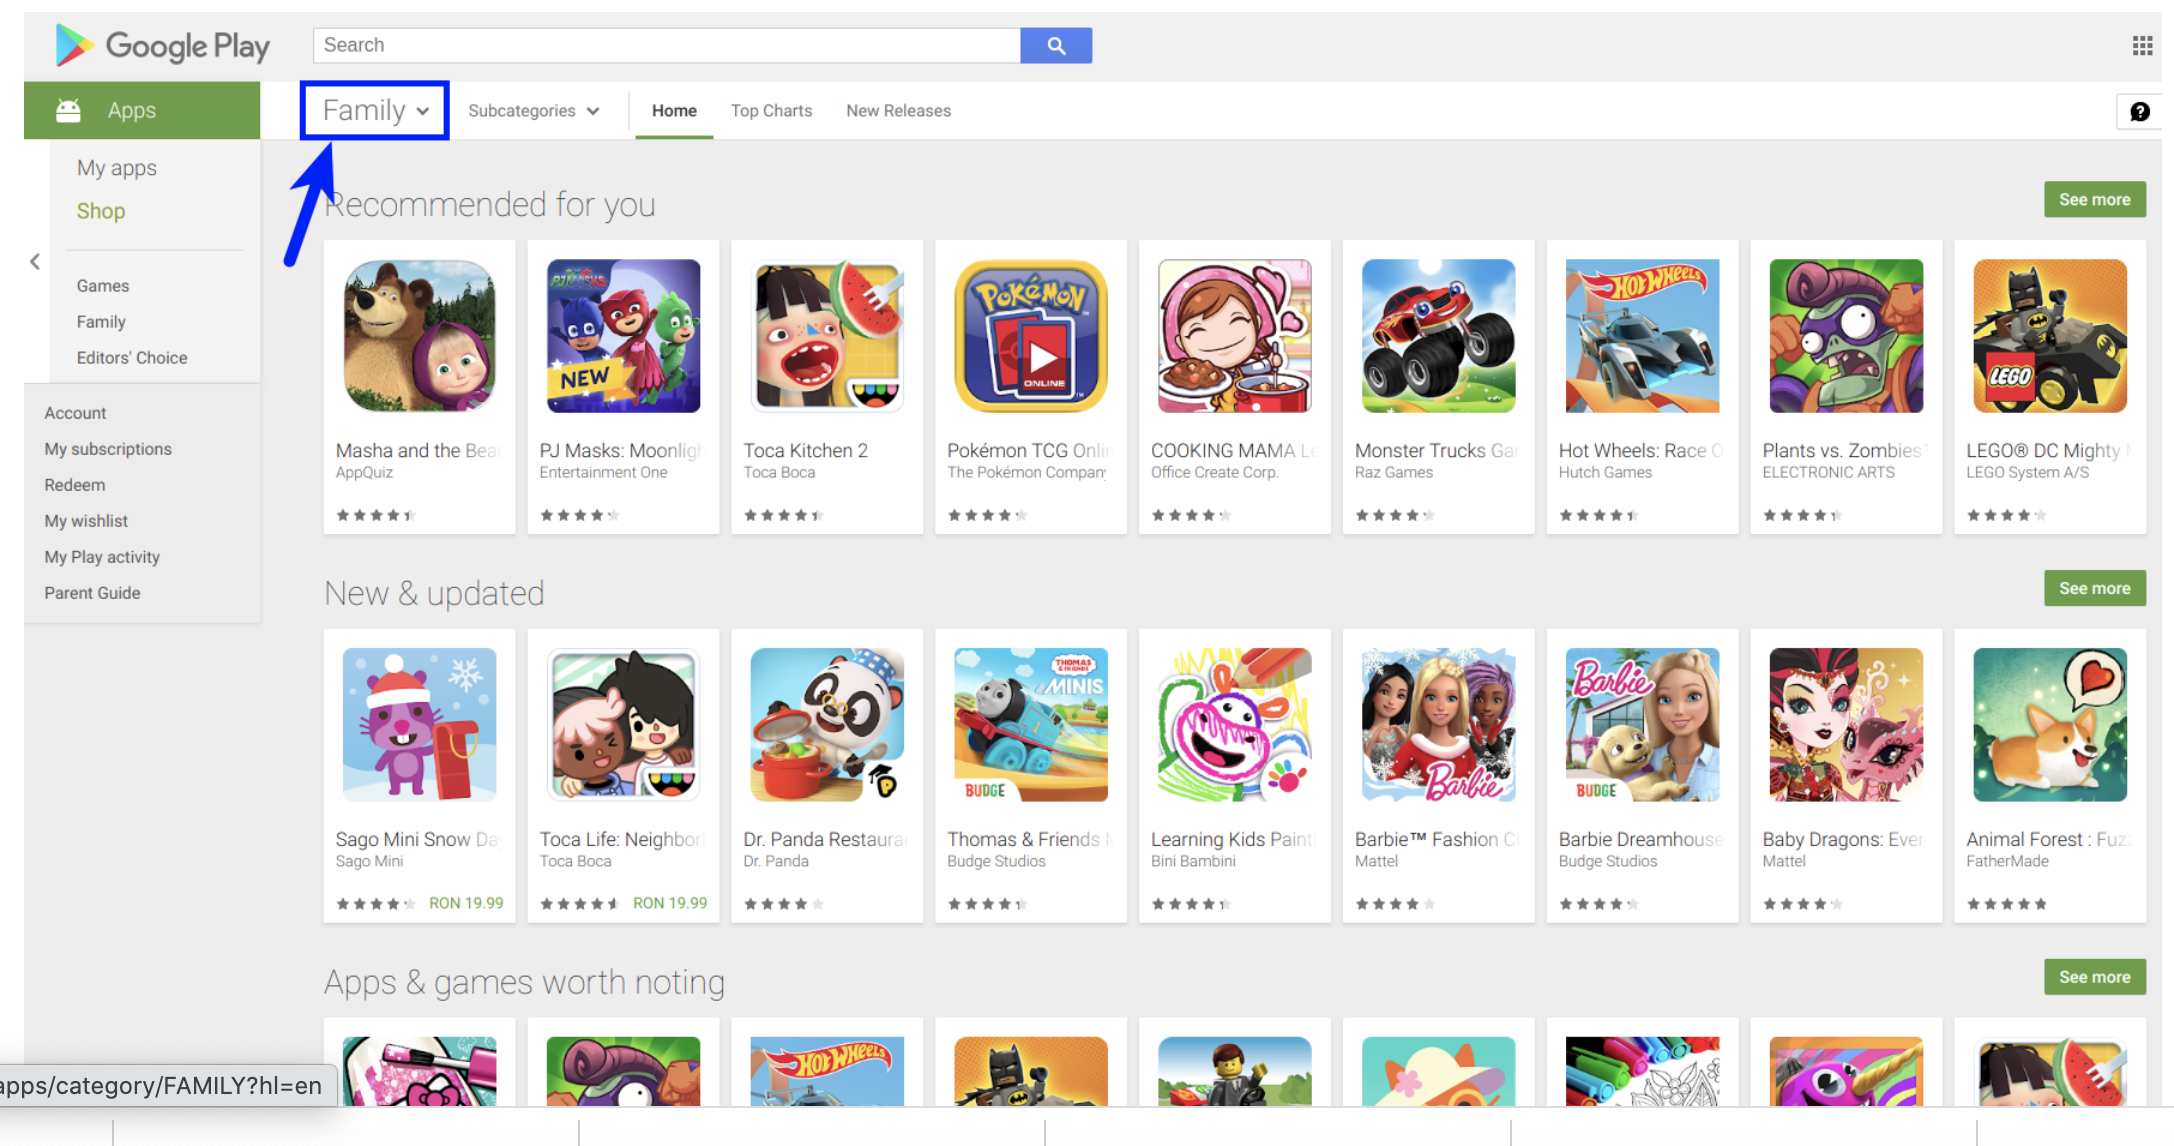

Even so, practical apps seem to have a better representation on Google Play compared to App Store. This picture is also confirmed by the frequency table we see for the Genres column:

In [138]:
display_table(free_google, -4)

Tools : 8.449909747292418
Entertainment : 6.069494584837545
Education : 5.347472924187725
Business : 4.591606498194946
Productivity : 3.892148014440433
Lifestyle : 3.892148014440433
Finance : 3.7003610108303246
Medical : 3.531137184115524
Sports : 3.463447653429603
Personalization : 3.3167870036101084
Communication : 3.2378158844765346
Action : 3.1024368231046933
Health & Fitness : 3.0798736462093865
Photography : 2.944494584837545
News & Magazines : 2.7978339350180503
Social : 2.6624548736462095
Travel & Local : 2.3240072202166067
Shopping : 2.2450361010830324
Books & Reference : 2.1435018050541514
Simulation : 2.0419675090252705
Dating : 1.861462093862816
Arcade : 1.8501805054151623
Video Players & Editors : 1.7712093862815883
Casual : 1.7599277978339352
Maps & Navigation : 1.3989169675090252
Food & Drink : 1.2409747292418771
Puzzle : 1.128158844765343
Racing : 0.9927797833935018
Role Playing : 0.9363718411552346
Libraries & Demo : 0.9363718411552346
Auto & Vehicles : 0.9250902527075

The difference between the Genres and the Category columns is not crystal clear, but one thing we can notice is that the Genres column is much more granular (it has more categories). We're only looking for the bigger picture at the moment, so we'll only work with the Category column moving forward.

Up to this point, we found that the App Store is dominated by apps designed for fun, while Google Play shows a more balanced landscape of both practical and for-fun apps. Now we'd like to get an idea about the kind of apps that have most users.

## Most Popular Apps by Genre on the App Store
We calculate the average number of user ratings per app genre on the App Store:

In [29]:
genres_apple = freq_table(free_apple, -5)

for genre in genres_apple:
    total = 0
    len_genre = 0
    for app in free_apple:
        genre_app = app[-5]
        if genre_app == genre:            
            n_ratings = float(app[5])
            total += n_ratings
            len_genre += 1
    avg_n_ratings = total / len_genre
    print(genre, ':', avg_n_ratings)

Social Networking : 71548.34905660378
Photo & Video : 28441.54375
Games : 22788.6696905016
Music : 57326.530303030304
Reference : 74942.11111111111
Health & Fitness : 23298.015384615384
Weather : 52279.892857142855
Utilities : 18684.456790123455
Travel : 28243.8
Shopping : 26919.690476190477
News : 21248.023255813954
Navigation : 86090.33333333333
Lifestyle : 16485.764705882353
Entertainment : 14029.830708661417
Food & Drink : 33333.92307692308
Sports : 23008.898550724636
Book : 39758.5
Finance : 31467.944444444445
Education : 7003.983050847458
Productivity : 21028.410714285714
Business : 7491.117647058823
Catalogs : 4004.0
Medical : 612.0


On average, navigation apps have the highest number of user reviews, but this figure is heavily influenced by Waze and Google Maps, which have close to half a million user reviews together:

In [30]:
for app in free_apple:
    if app[-5] == 'Navigation':
        print(app[1], ':', app[5]) # print name and number of ratings

Waze - GPS Navigation, Maps & Real-time Traffic : 345046
Google Maps - Navigation & Transit : 154911
Geocaching® : 12811
CoPilot GPS – Car Navigation & Offline Maps : 3582
ImmobilienScout24: Real Estate Search in Germany : 187
Railway Route Search : 5


The same pattern applies to social networking apps, where the average number is heavily influenced by a few giants like Facebook, Pinterest, Skype, etc. Same applies to music apps, where a few big players like Pandora, Spotify, and Shazam heavily influence the average number.


Reference apps have 74,942 user ratings on average, but it's actually the Bible and Dictionary.com which skew up the average rating:

In [31]:
for app in free_apple:
    if app[-5] == 'Reference':
        print(app[1], ':', app[5])

Bible : 985920
Dictionary.com Dictionary & Thesaurus : 200047
Dictionary.com Dictionary & Thesaurus for iPad : 54175
Google Translate : 26786
Muslim Pro: Ramadan 2017 Prayer Times, Azan, Quran : 18418
New Furniture Mods - Pocket Wiki & Game Tools for Minecraft PC Edition : 17588
Merriam-Webster Dictionary : 16849
Night Sky : 12122
City Maps for Minecraft PE - The Best Maps for Minecraft Pocket Edition (MCPE) : 8535
LUCKY BLOCK MOD ™ for Minecraft PC Edition - The Best Pocket Wiki & Mods Installer Tools : 4693
GUNS MODS for Minecraft PC Edition - Mods Tools : 1497
Guides for Pokémon GO - Pokemon GO News and Cheats : 826
WWDC : 762
Horror Maps for Minecraft PE - Download The Scariest Maps for Minecraft Pocket Edition (MCPE) Free : 718
VPN Express : 14
Real Bike Traffic Rider Virtual Reality Glasses : 8
教えて!goo : 0
Jishokun-Japanese English Dictionary & Translator : 0


# Most Popular Apps by Genre on Google Play
For the Google Play market, we actually have data about the number of installs, so we should be able to get a clearer picture about genre popularity.

In [32]:
display_table(free_google, 5) # the Installs columns

1,000,000+ : 15.726534296028879
100,000+ : 11.552346570397113
10,000,000+ : 10.548285198555957
10,000+ : 10.198555956678701
1,000+ : 8.393501805054152
100+ : 6.915613718411552
5,000,000+ : 6.825361010830325
500,000+ : 5.561823104693141
50,000+ : 4.7721119133574
5,000+ : 4.512635379061372
10+ : 3.5424187725631766
500+ : 3.2490974729241873
50,000,000+ : 2.3014440433213
100,000,000+ : 2.1322202166064983
50+ : 1.917870036101083
5+ : 0.78971119133574
1+ : 0.5076714801444043
500,000,000+ : 0.2707581227436823
1,000,000,000+ : 0.22563176895306858
0+ : 0.04512635379061372
0 : 0.01128158844765343


We're going to leave the numbers as they are, which means that we'll consider that an app with 100,000+ installs has 100,000 installs and so on

In [33]:
categories_google = freq_table(free_google, 1)

for category in categories_google:
    total = 0
    len_category = 0
    for app in free_google:
        category_app = app[1]
        if category_app == category:            
            n_installs = app[5]
            n_installs = n_installs.replace(',', '')
            n_installs = n_installs.replace('+', '')
            total += float(n_installs)
            len_category += 1
    avg_n_installs = total / len_category
    print(category, ':', avg_n_installs)

ART_AND_DESIGN : 1986335.0877192982
AUTO_AND_VEHICLES : 647317.8170731707
BEAUTY : 513151.88679245283
BOOKS_AND_REFERENCE : 8767811.894736841
BUSINESS : 1712290.1474201474
COMICS : 817657.2727272727
COMMUNICATION : 38456119.167247385
DATING : 854028.8303030303
EDUCATION : 1833495.145631068
ENTERTAINMENT : 11640705.88235294
EVENTS : 253542.22222222222
FINANCE : 1387692.475609756
FOOD_AND_DRINK : 1924897.7363636363
HEALTH_AND_FITNESS : 4188821.9853479853
HOUSE_AND_HOME : 1331540.5616438356
LIBRARIES_AND_DEMO : 638503.734939759
LIFESTYLE : 1437816.2687861272
GAME : 15588015.603248259
FAMILY : 3695641.8198090694
MEDICAL : 120550.61980830671
SOCIAL : 23253652.127118643
SHOPPING : 7036877.311557789
PHOTOGRAPHY : 17840110.40229885
SPORTS : 3638640.1428571427
TRAVEL_AND_LOCAL : 13984077.710144928
TOOLS : 10801391.298666667
PERSONALIZATION : 5201482.6122448975
PRODUCTIVITY : 16787331.344927534
PARENTING : 542603.6206896552
WEATHER : 5074486.197183099
VIDEO_PLAYERS : 24727872.452830188
NEWS_AND_

In [34]:
for app in free_google:
    if app[1] == 'COMMUNICATION' and (app[5] == '1,000,000,000+'
                                      or app[5] == '500,000,000+'
                                      or app[5] == '100,000,000+'):
        print(app[0], ':', app[5])

WhatsApp Messenger : 1,000,000,000+
imo beta free calls and text : 100,000,000+
Android Messages : 100,000,000+
Google Duo - High Quality Video Calls : 500,000,000+
Messenger – Text and Video Chat for Free : 1,000,000,000+
imo free video calls and chat : 500,000,000+
Skype - free IM & video calls : 1,000,000,000+
Who : 100,000,000+
GO SMS Pro - Messenger, Free Themes, Emoji : 100,000,000+
LINE: Free Calls & Messages : 500,000,000+
Google Chrome: Fast & Secure : 1,000,000,000+
Firefox Browser fast & private : 100,000,000+
UC Browser - Fast Download Private & Secure : 500,000,000+
Gmail : 1,000,000,000+
Hangouts : 1,000,000,000+
Messenger Lite: Free Calls & Messages : 100,000,000+
Kik : 100,000,000+
KakaoTalk: Free Calls & Text : 100,000,000+
Opera Mini - fast web browser : 100,000,000+
Opera Browser: Fast and Secure : 100,000,000+
Telegram : 100,000,000+
Truecaller: Caller ID, SMS spam blocking & Dialer : 100,000,000+
UC Browser Mini -Tiny Fast Private & Secure : 100,000,000+
Viber Mess

If we removed all the communication apps that have over 100 million installs, the average would be reduced roughly ten times:

In [35]:
under_100_m = []

for app in free_google:
    n_installs = app[5]
    n_installs = n_installs.replace(',', '')
    n_installs = n_installs.replace('+', '')
    if (app[1] == 'COMMUNICATION') and (float(n_installs) < 100000000):
        under_100_m.append(float(n_installs))
        
sum(under_100_m) / len(under_100_m)

3603485.3884615386

We see the same pattern for the video players category, which is the runner-up with 24,727,872 installs. The market is dominated by apps like Youtube, Google Play Movies & TV, or MX Player. The pattern is repeated for social apps (where we have giants like Facebook, Instagram, Google+, etc.), photography apps (Google Photos and other popular photo editors), or productivity apps (Microsoft Word, Dropbox, Google Calendar, Evernote, etc.).

The books and reference genre looks fairly popular as well, with an average number of installs of 8,767,811.

In [36]:
for app in free_google:
    if app[1] == 'BOOKS_AND_REFERENCE':
        print(app[0], ':', app[5])

E-Book Read - Read Book for free : 50,000+
Download free book with green book : 100,000+
Wikipedia : 10,000,000+
Cool Reader : 10,000,000+
Free Panda Radio Music : 100,000+
Book store : 1,000,000+
FBReader: Favorite Book Reader : 10,000,000+
English Grammar Complete Handbook : 500,000+
Free Books - Spirit Fanfiction and Stories : 1,000,000+
Google Play Books : 1,000,000,000+
AlReader -any text book reader : 5,000,000+
Offline English Dictionary : 100,000+
Offline: English to Tagalog Dictionary : 500,000+
FamilySearch Tree : 1,000,000+
Cloud of Books : 1,000,000+
Recipes of Prophetic Medicine for free : 500,000+
ReadEra – free ebook reader : 1,000,000+
Anonymous caller detection : 10,000+
Ebook Reader : 5,000,000+
Litnet - E-books : 100,000+
Read books online : 5,000,000+
English to Urdu Dictionary : 500,000+
eBoox: book reader fb2 epub zip : 1,000,000+
English Persian Dictionary : 500,000+
Flybook : 500,000+
All Maths Formulas : 1,000,000+
Ancestry : 5,000,000+
HTC Help : 10,000,000+
E

The book and reference genre includes a variety of apps: software for processing and reading ebooks, various collections of libraries, dictionaries, tutorials on programming or languages, etc. It seems there's still a small number of extremely popular apps that skew the average:

In [37]:
for app in free_google:
    if app[1] == 'BOOKS_AND_REFERENCE' and (app[5] == '1,000,000,000+'
                                            or app[5] == '500,000,000+'
                                            or app[5] == '100,000,000+'):
        print(app[0], ':', app[5])

Google Play Books : 1,000,000,000+
Bible : 100,000,000+
Amazon Kindle : 100,000,000+
Wattpad 📖 Free Books : 100,000,000+
Audiobooks from Audible : 100,000,000+


However, it looks like there are only a few very popular apps, so this market still shows potential.

In [38]:
for app in free_google:
    if app[1] == 'BOOKS_AND_REFERENCE' and (app[5] == '1,000,000+'
                                            or app[5] == '5,000,000+'
                                            or app[5] == '10,000,000+'
                                            or app[5] == '50,000,000+'):
        print(app[0], ':', app[5])

Wikipedia : 10,000,000+
Cool Reader : 10,000,000+
Book store : 1,000,000+
FBReader: Favorite Book Reader : 10,000,000+
Free Books - Spirit Fanfiction and Stories : 1,000,000+
AlReader -any text book reader : 5,000,000+
FamilySearch Tree : 1,000,000+
Cloud of Books : 1,000,000+
ReadEra – free ebook reader : 1,000,000+
Ebook Reader : 5,000,000+
Read books online : 5,000,000+
eBoox: book reader fb2 epub zip : 1,000,000+
All Maths Formulas : 1,000,000+
Ancestry : 5,000,000+
HTC Help : 10,000,000+
Moon+ Reader : 10,000,000+
English-Myanmar Dictionary : 1,000,000+
Golden Dictionary (EN-AR) : 1,000,000+
All Language Translator Free : 1,000,000+
Aldiko Book Reader : 10,000,000+
Dictionary - WordWeb : 5,000,000+
50000 Free eBooks & Free AudioBooks : 5,000,000+
Al-Quran (Free) : 10,000,000+
Al Quran Indonesia : 10,000,000+
Al'Quran Bahasa Indonesia : 10,000,000+
Al Quran Al karim : 1,000,000+
Al Quran : EAlim - Translations & MP3 Offline : 5,000,000+
Koran Read &MP3 30 Juz Offline : 1,000,000+
H

However, it looks like the market is already full of libraries, so we need to add some special features besides the raw version of the book.

# Conclusions
In this project, we analyzed data about the App Store and Google Play mobile apps with the goal of recommending an app profile that can be profitable for both markets.

We concluded that taking a popular book (perhaps a more recent book) and turning it into an app could be profitable for both the Google Play and the App Store markets. The markets are already full of libraries, so we need to add some special features besides the raw version of the book. This might include daily quotes from the book, an audio version of the book, quizzes on the book, a forum where people can discuss the book,